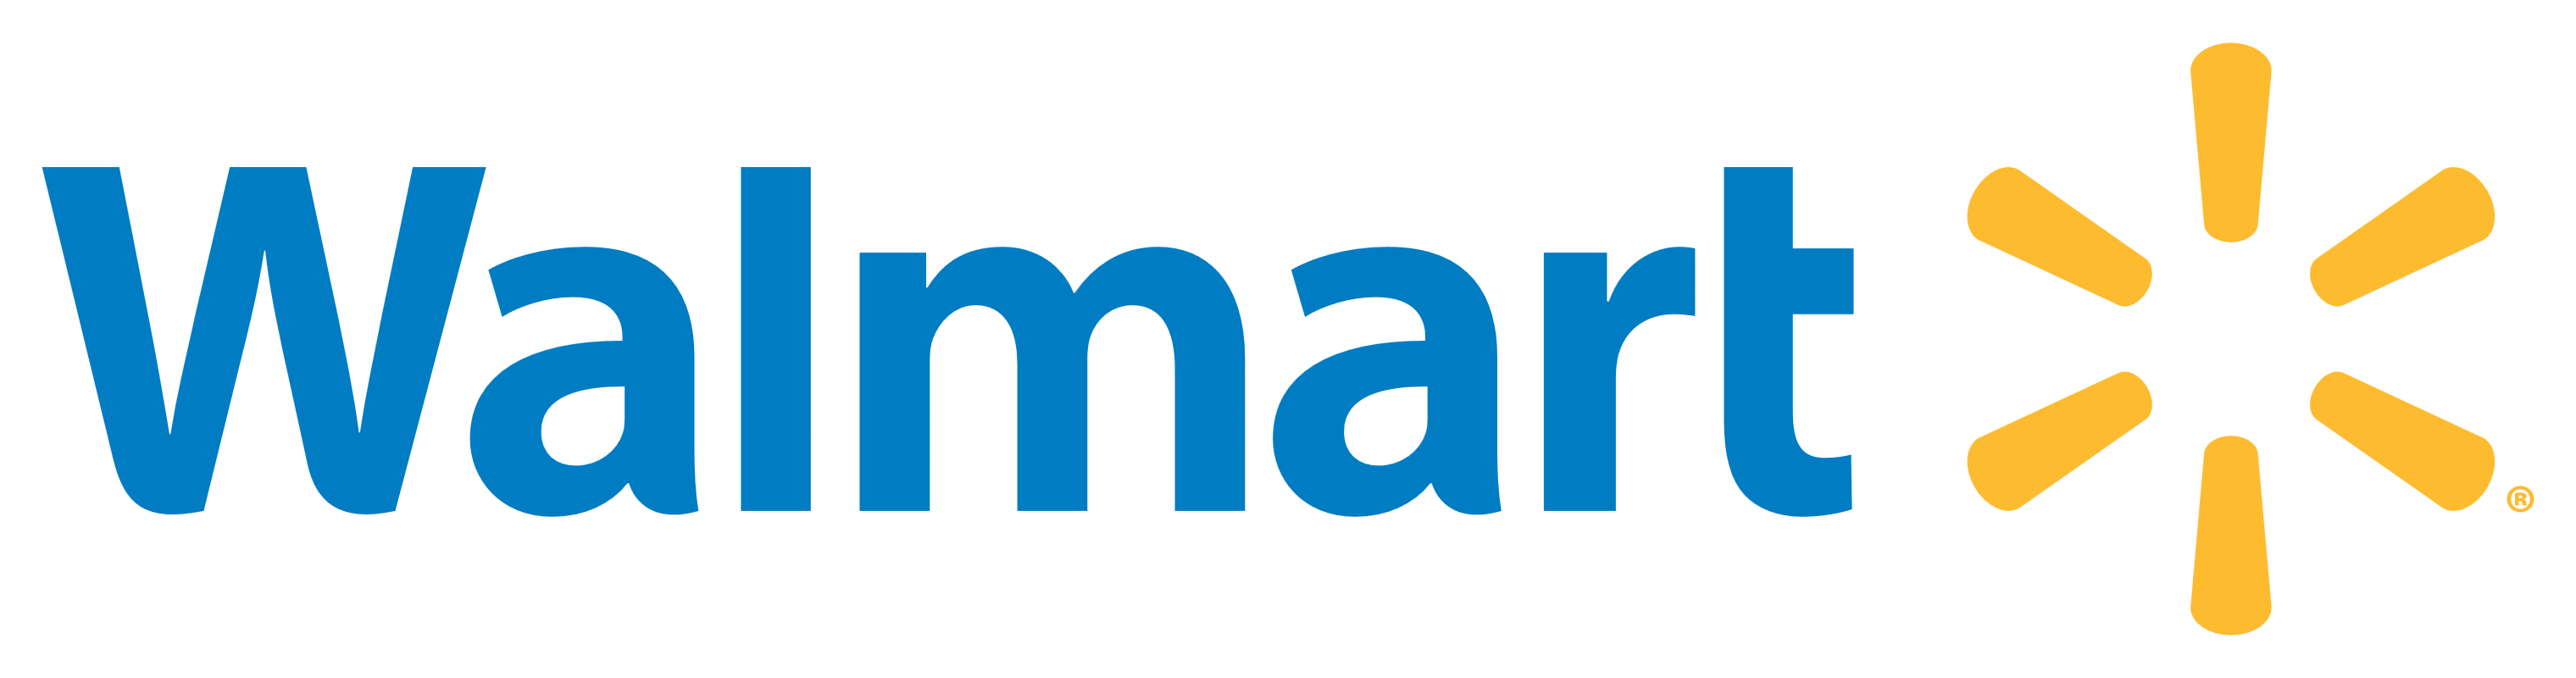

# ***Business Case : Walmart***

## **About Walmart**

`Walmart`, founded in `1962` by `Sam Walton`, is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## **Objective**

The Management team at Walmart Inc. wants `to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors` to help the business make better decisions. They want to understand if the `spending habits differ between male and female customers`:

Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



## **About Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

Walmart Dataset Link :- https://docs.google.com/spreadsheets/d/10xEaaEbxYbKa2MJ4IEl_Mlu-8HvVv5sLKczsfFm9Cnw/edit?usp=sharing

Business Case Walmart :- https://drive.google.com/file/d/19l-t5uBRshBQJgUcTxv_90l_gopDmYPk/view?usp=sharing

### **Features of Dataset :**
A) User_ID:	User ID


---


B) Product_ID:	Product ID


---


C) Gender:	Sex of User


---


D) Age:	Age in bins


---


E) Occupation:	Occupation(Masked)


---


F) City_Category:	Category of the City (A,B,C)


---


G) StayInCurrentCityYears:	Number of years stay in current city


---


H) Marital_Status:	Marital Status


---


I) ProductCategory:	Product Category (Masked)


---


J) Purchase:	Purchase Amount


---






## **Analytical Framing**
This analysis treats the available dataset as a sample drawn from a much larger population of Walmart customers (assumed 50 million male and 50 million female customers).

Statistical inference techniques such as the Central Limit Theorem and Confidence Intervals are therefore applied to generalize sample-level observations to population-level conclusions.

## **Importing Library and Data Set**

In [225]:
#importing libraries
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [226]:
# loading the dataset
!wget --no-check-certificate "https://docs.google.com/spreadsheets/d/10xEaaEbxYbKa2MJ4IEl_Mlu-8HvVv5sLKczsfFm9Cnw/export?format=csv" -O walmart_data.csv
walmart_df = pd.read_csv('walmart_data.csv')
walmart_df

--2025-12-27 12:05:02--  https://docs.google.com/spreadsheets/d/10xEaaEbxYbKa2MJ4IEl_Mlu-8HvVv5sLKczsfFm9Cnw/export?format=csv
Resolving docs.google.com (docs.google.com)... 64.233.170.102, 64.233.170.100, 64.233.170.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.170.102|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0g-bg-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/khvamrk917ouq9cn7n9h4tp5ec/1766837100000/100985905802793564554/*/10xEaaEbxYbKa2MJ4IEl_Mlu-8HvVv5sLKczsfFm9Cnw?format=csv [following]
--2025-12-27 12:05:03--  https://doc-0g-bg-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/khvamrk917ouq9cn7n9h4tp5ec/1766837100000/100985905802793564554/*/10xEaaEbxYbKa2MJ4IEl_Mlu-8HvVv5sLKczsfFm9Cnw?format=csv
Resolving doc-0g-bg-sheets.googleusercontent.com (doc-0g-bg-sheets.googleusercontent.com)... 142.251.12.132, 2404:6800:4003:c11::84
Connecting to doc-0g-bg-sheets.googleuserconte

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


## **Exploratory Data Analysis**

**Create the copy of original data**

In [227]:
df = walmart_df.copy()
df # copy created

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


This dataset contains transactional purchase data from Walmart stores during Black Friday.

It includes customer demographics, product details, and purchase amount.
The dataset consists of 550,068 rows and 10 columns.

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years columns have `Object` datatype

* User_ID, Occupation, Marital_Status, Product_Category, Purchase columns have `Integer` datatype

In [229]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [230]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [231]:
df.duplicated().sum()

np.int64(0)

In [232]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [233]:
df.memory_usage()

,0
Index,132
User_ID,4400544
Product_ID,4400544
Gender,4400544
Age,4400544
Occupation,4400544
City_Category,4400544
Stay_In_Current_City_Years,4400544
Marital_Status,4400544
Product_Category,4400544


**Dataset Structure & Characteristics**

- The dataset contains 550,068 transactions with 10 features.
- The dataset is well-structured with no data quality issues such as missing or duplicate values.
- Five columns are numerical and five are categorical in nature.
- Gender has two categories (Male and Female).
- Age is represented in bins rather than exact values.
- City_Category has three levels: A, B, and C.
- Purchase amount is a numerical variable with a wide range of values.

## **Data Cleaning and Type Conversion**

**Convert all object/string columns to categorical, excluding 'Purchase'**

In [234]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

Although `User_ID` and `Product_ID` were converted to categorical types for memory efficiency, they were not used as analytical predictors. These fields function purely as identifiers and were excluded from statistical inference and business interpretation.

**Convert Marital_Status from 0 or 1 to Married (1) or Unmarried(0).**

In [235]:
df['Marital_Status'] = df['Marital_Status'].cat.rename_categories({
    0: 'Unmarried',
    1: 'Married'})

In [236]:
df['Gender'] = df['Gender'].cat.rename_categories({
    'F': 'Female',
    'M': 'Male'})

In [237]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

df['Age'] = df['Age'].cat.set_categories(age_order, ordered=True)

In [238]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].cat.rename_categories({
    '0': 'Less than 1 year',
    '1': '1 year',
    '2': '2 year',
    '3': '3 year',
    '4+': '4 or more year'})

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [240]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2 year,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2 year,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2 year,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2 year,Unmarried,12,1057
4,1000002,P00285442,Male,55+,16,C,4 or more year,Unmarried,8,7969


**Data Cleaning & Type Conversion — Insights**

- All object and identifier columns were converted to categorical data types to improve memory efficiency and optimize analytical performance.
- This conversion reduced memory usage significantly from approximately 42 MB to 10.3 MB, making the dataset more efficient to work with.
- The Marital_Status variable was converted from binary values (0 and 1) to meaningful labels (Unmarried and Married) to improve interpretability in analysis and visualizations.
- Age was retained as a categorical variable and explicitly ordered to reflect natural life-stage progression, enabling clearer comparisons across age groups.
- Stay_In_Current_City_Years was kept as a categorical variable and relabeled with descriptive values to support group-wise comparison rather than numeric trend modeling.


## **Non-Graphical Analysis**

In [241]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*70)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------
Unique Values in Gender column are :-
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
----------------------------------------------------------------------
Unique Values in Age column are :-
['0-17', '55+', '26-35', '46-50', '51-55', '36-4

## **Statistical Summary**

In [242]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [243]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,Male,26-35,4,B,1 year,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Statistical Summary & Non-Graphical Analysis Insights**

1. The dataset consists of 550,068 transactions generated by 5,891 unique users, indicating that individual customers made multiple purchases during the Black Friday period.

2. A total of 3,631 unique products were sold. The product with ID P00265242 recorded the highest number of transactions (1,880), indicating strong customer demand for this product during the event.

3. Transactional activity is heavily skewed towards male customers, with approximately 75% of all purchases made by males. This highlights a significant imbalance in transaction volume between male and female shoppers during Black Friday.

4. The dataset includes seven distinct age groups. Customers in the 26–35 age group contributed the highest number of transactions (219,587), making this the most active age segment during the sale period.

5. Customers who have stayed in their current city for one year account for the highest number of transactions (193,821), suggesting that relatively recent residents were more active shoppers during the event.

6. Unmarried customers contributed approximately 59% of total transactions, while married customers accounted for the remaining 41%, indicating higher shopping activity among unmarried individuals.

7. Purchase amounts exhibit a wide range, with values spanning `from $12 to $23,961`.

8. At this stage, no data transformations or filtering were applied to the Purchase variable, ensuring that all observations were retained for unbiased exploratory and statistical analysis.


### **Mean vs Median Analysis — Purchase Amount**

* The average (mean) purchase amount is 9,263.97 USD, while the median purchase amount is 8,047 USD.

* Since the mean is noticeably higher than the median, this indicates a right-skewed distribution of purchase values. A relatively small number of high-value transactions increases the average spending, while the majority of customers spend below the mean.

* This skewness is also supported by the presence of upper-end outliers identified in the boxplot analysis. As a result, the median provides a more representative measure of typical customer spending, while the mean is influenced by high-value purchases.

* Understanding this difference is important for business decision-making and statistical inference, as it highlights variability in spending behavior and justifies the use of confidence intervals rather than relying solely on averages.


### **Unique Attributes**

**Q1. What is the total Revenue generated by Walmart from each Gender ?**

In [244]:
df_gender_revenue = df.groupby(by = ['Gender'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_gender_revenue['percent_share'] = np.round((df_gender_revenue['Purchase'] / df_gender_revenue['Purchase'].sum()) * 100, 2)
df_gender_revenue

,Gender,Purchase,percent_share
0,Male,3909580100,76.72
1,Female,1186232642,23.28


Male customers contribute approximately 76.7% of total Black Friday revenue, which aligns with their higher share of transactions. However, this does not yet indicate whether male customers spend more per transaction on average.


**Q2. What is the total Revenue generated by Walmart from each Marital Status ?**

In [245]:
df_marital_status_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_status_revenue['percent_share'] = np.round((df_marital_status_revenue['Purchase'] / df_marital_status_revenue['Purchase'].sum()) * 100, 2)
df_marital_status_revenue

,Marital_Status,Purchase,percent_share
0,Unmarried,3008927447,59.05
1,Married,2086885295,40.95


Unmarried customers generate a higher share of total revenue (59.05%), suggesting higher shopping activity compared to married customers during the event.


**Q3. What is the share of unique custumer based on their age group?**

In [246]:
df_age_dist = pd.DataFrame(df.groupby(by = ['Age'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'}).sort_values(by = 'unique_customers', ascending = False)
df_age_dist['percent_share'] =  np.round(df_age_dist['unique_customers'] / df_age_dist['unique_customers'].sum() * 100, 2)
df_age_dist

,Age,unique_customers,percent_share
2,26-35,2053,34.85
3,36-45,1167,19.81
1,18-25,1069,18.15
4,46-50,531,9.01
5,51-55,481,8.16
6,55+,372,6.31
0,0-17,218,3.70


**Q4. What is the share of revenue genrated from each age group?**

In [247]:
df_age_revenue = pd.DataFrame(df.groupby(by = 'Age', as_index = False)['Purchase'].sum()).sort_values(by = 'Purchase', ascending = False)
df_age_revenue['percent_share'] = np.round((df_age_revenue['Purchase'] / df_age_revenue['Purchase'].sum()) * 100, 2)
df_age_revenue

,Age,Purchase,percent_share
2,26-35,2031770578,39.87
3,36-45,1026569884,20.15
1,18-25,913848675,17.93
4,46-50,420843403,8.26
5,51-55,367099644,7.20
6,55+,200767375,3.94
0,0-17,134913183,2.65


**Q5. What is the revenue generated from different cities ?**

In [248]:
df_city_revenue = df.groupby(by = ['City_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_city_revenue['percent_share'] = np.round((df_city_revenue['Purchase'] / df_city_revenue['Purchase'].sum()) * 100, 2)
df_city_revenue

,City_Category,Purchase,percent_share
0,B,2115533605,41.52
1,C,1663807476,32.65
2,A,1316471661,25.83


**Q6. What is the revenue generated from different product categories ?**

In [249]:
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue['percent_share'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
df_product_revenue

,Product_Category,Purchase,percent_share
0,1,1910013754,37.48
1,5,941835229,18.48
2,8,854318799,16.77
3,6,324150302,6.36
4,2,268516186,5.27
5,3,204084713,4.00
6,16,145120612,2.85
7,11,113791115,2.23
8,10,100837301,1.98
9,15,92969042,1.82


### **Countplots for Categorical Variables**

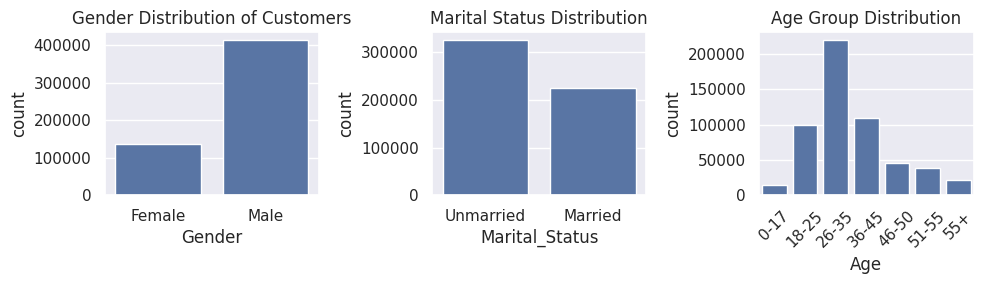

In [250]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Gender distribution
sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution of Customers')

# Marital Status distribution
sns.countplot(x='Marital_Status', data=df, ax=axes[1])
axes[1].set_title('Marital Status Distribution')

# Age group distribution
sns.countplot(x='Age', data=df, ax=axes[2])
axes[2].set_title('Age Group Distribution')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Visual Analysis & Outlier Detection**

### **Univariate Analysis**

#### **Numerical**

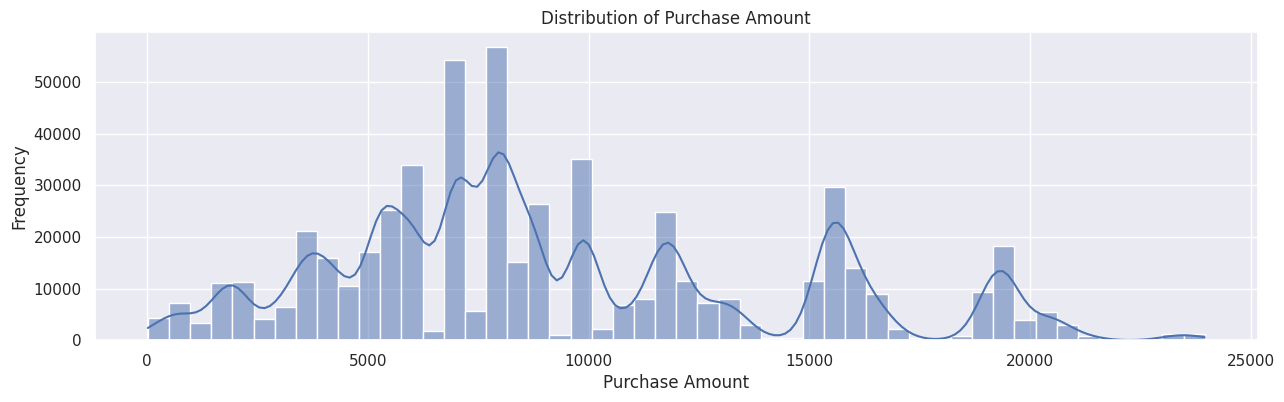

In [251]:
plt.figure(figsize=(15,4))
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

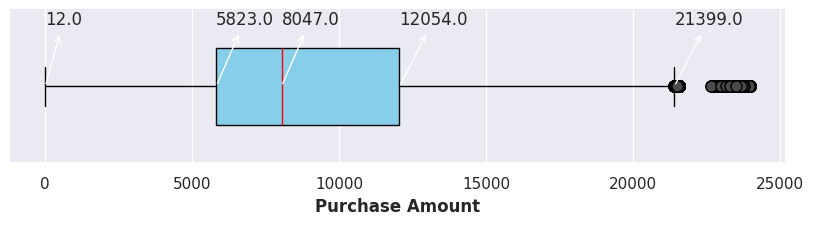

In [252]:
fig, ax = plt.subplots(figsize=(10, 2))
boxplot = ax.boxplot(x=df['Purchase'], vert=False, patch_artist=True, widths=0.5)
boxplot['boxes'][0].set(facecolor='skyblue')
boxplot['medians'][0].set(color='red')

for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

info = [i.get_xdata() for i in boxplot['whiskers']]  # getting the upperlimit, Q1, Q3 and lowerlimit

median = df['Purchase'].quantile(0.5)  # getting Q2

for i, j in info:
    ax.annotate(text=f"{i:.1f}", xy=(i, 1), xytext=(i, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

    ax.annotate(text=f"{j:.1f}", xy=(j, 1), xytext=(j, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

ax.annotate(text=f"{median:.1f}", xy=(median, 1), xytext=(median + 1, 1.4), fontsize=12,
             arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))
ax.set_yticks([])
ax.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)
plt.show()

In [253]:
# Calculate quartiles and IQR for the specified column
Q1 = np.percentile(df['Purchase'], 25)
Q3 = np.percentile(df['Purchase'], 75)
IQR = Q3 - Q1

# Upper and lower bounds for outliers
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

# Outliers in the specified column
upper_outliers_df = df[df['Purchase'] > upper_bound]
lower_outliers_df = df[df['Purchase'] < lower_bound]

# Count of outliers
upper_count = len(upper_outliers_df)
lower_count = len(lower_outliers_df)

total_count = upper_count + lower_count
print(f"Upper Outliers Count: {upper_count}")
print(f"Lower Outliers Count: {lower_count}")
print(f"Overall Outliers Count: {total_count}")

Upper Outliers Count: 2677
Lower Outliers Count: 0
Overall Outliers Count: 2677


**Observations**

`Outliers` :- There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

`Distribution` :- Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD. The lower limit of 12 USD while the upper limit of 21,399 USD reveal significant variability in customer spending

#### **Categorical**

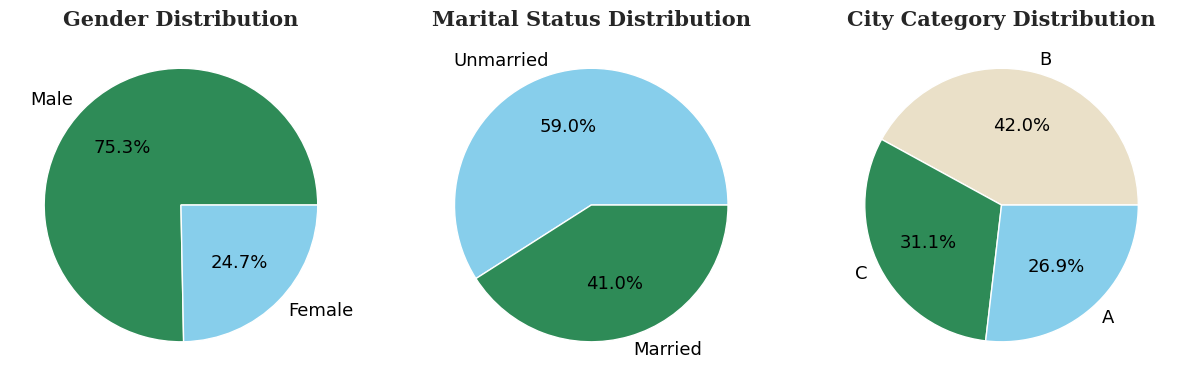

In [254]:
fig = plt.figure(figsize = (15,12))
gs = fig.add_gridspec(1,3)

# creating pie chart for gender distribution
ax0 = fig.add_subplot(gs[0,0])

color_map = ["seagreen", "skyblue"]
ax0.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct = '%.1f%%',
        colors = color_map, textprops={'fontsize': 13, 'color': 'black'})

ax0.set_title('Gender Distribution', {'font':'serif', 'size':15, 'weight':'bold'})

# creating pie chart for marital status
ax1 = fig.add_subplot(gs[0,1])

color_map = ["skyblue", "seagreen"]
ax1.pie(df['Marital_Status'].value_counts().values, labels = df['Marital_Status'].value_counts().index, autopct = '%.1f%%',
        colors = color_map, textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax1.set_title('Marital Status Distribution', {'font':'serif', 'size':15, 'weight':'bold'})

# creating pie chart for city category
ax2 = fig.add_subplot(gs[0,2])

color_map = ["#eae0c8", "seagreen", "skyblue"]
ax2.pie(df['City_Category'].value_counts().values, labels = df['City_Category'].value_counts().index, autopct = '%.1f%%',
        colors = color_map, textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('City Category Distribution', {'font':'serif', 'size':15, 'weight':'bold'})
plt.show()

**Observation**
1. Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

2. Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

3. City Category - City B saw the most number of transactions followed by City C and City A respectively.

4. These distributions describe transaction composition and do not indicate differences in average spending behavior.

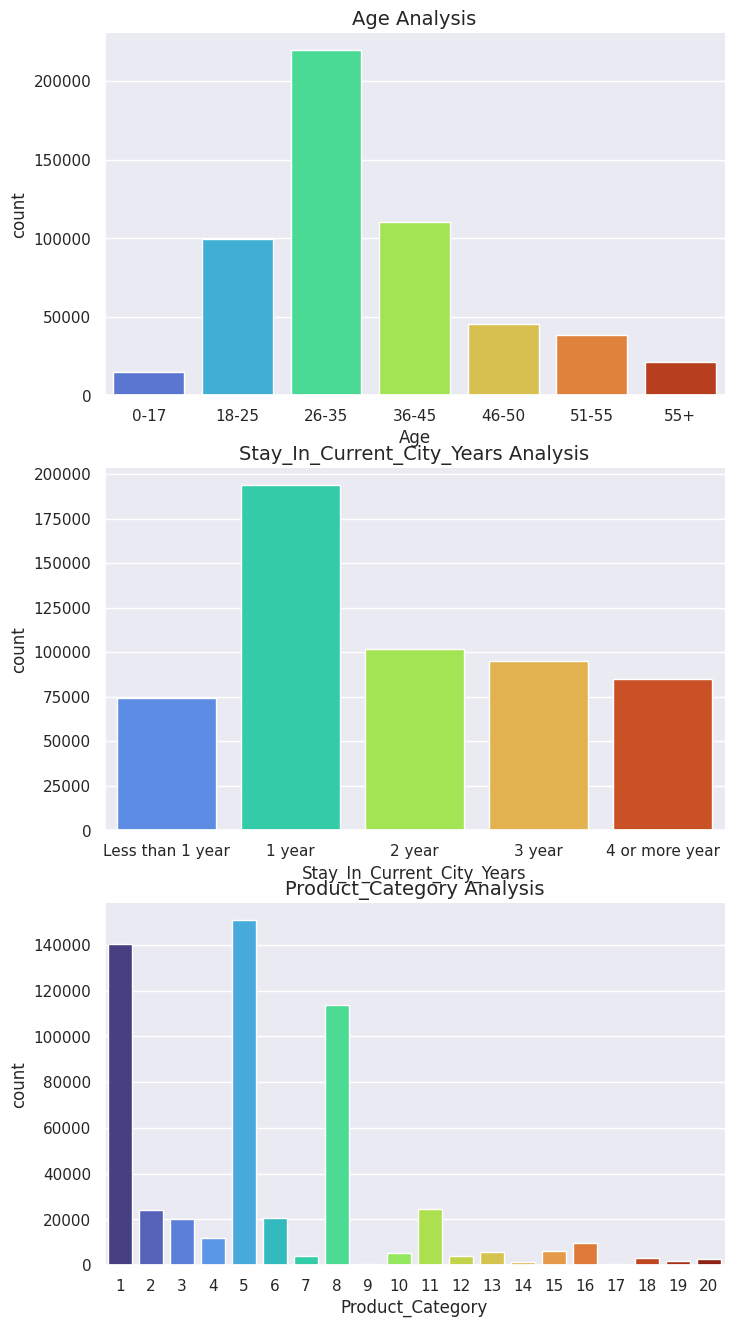

In [255]:
categorical_ = ['Age', 'Stay_In_Current_City_Years', 'Product_Category']
plt.figure(figsize=(8,16))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(categorical_, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=df, x=col, hue=col, palette='turbo', legend=False)
    sns.despine()
    plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')

# Show the plot
plt.show()

**Observation**
* Age Group Distribution: The age group '26-35' has the highest count, indicating that customers in this age range make the most purchases. It is followed by the age groups '36-45' and '18-25'.

* City Residence Duration Impact: Customers with a longer duration of stay, particularly those with 1 year or more, account for a higher number of transactions. However, this does not directly imply higher spending per transaction.

* Product Category Purchase Analysis: Product categories ‘1’ and ‘5’ show the highest number of transactions, indicating higher purchase frequency rather than higher spending per transaction.

### **Bivariate Analysis**

#### **Purchase vs Gender**

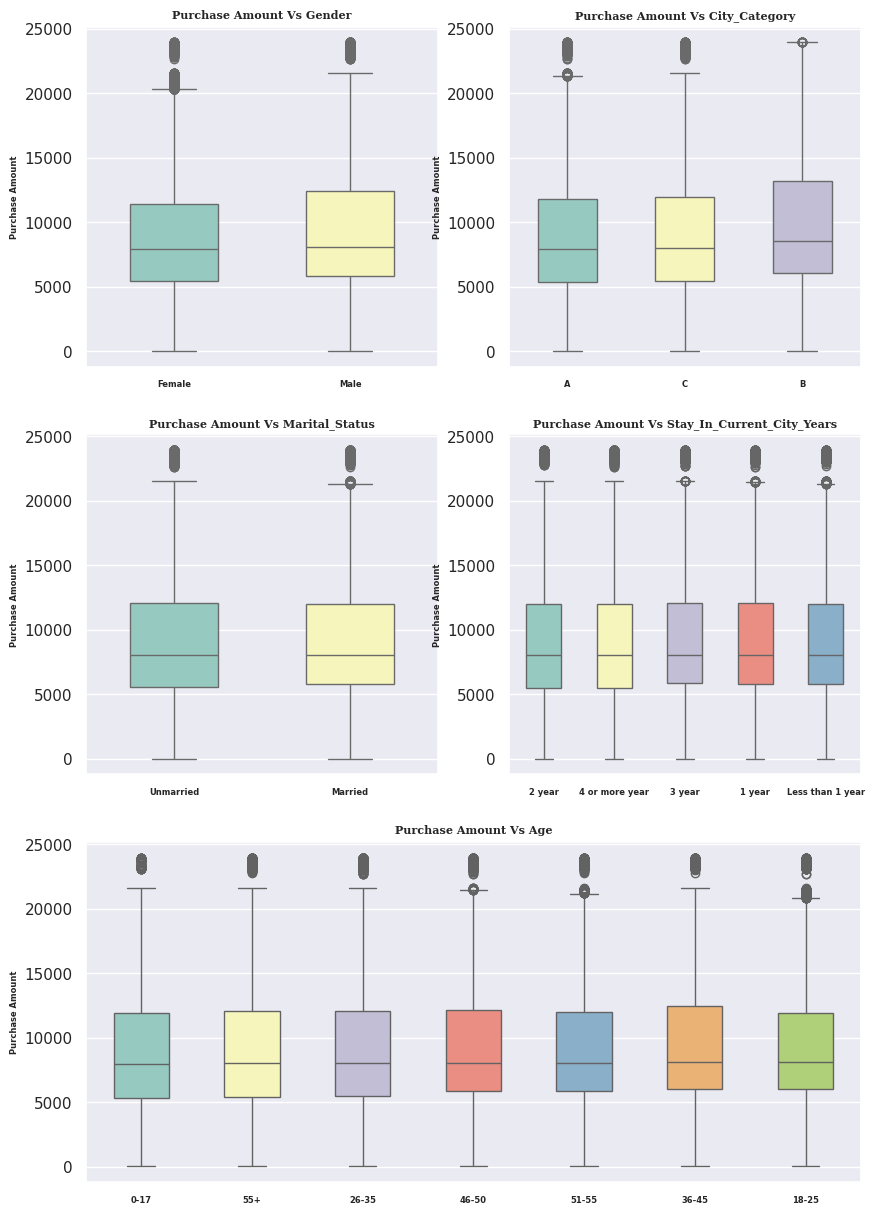

In [256]:
#setting the plot style
fig = plt.figure(figsize = (10,15))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    sns.boxplot(data = df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette ="Set3")

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':8,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df[k].unique(),fontweight = 'bold',fontsize = 6)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 6)
    ax0.set_xlabel('')


plt.show()

Out of all the variables analysed above, it's noteworthy that Visual inspection suggests that median purchase amounts are broadly similar across groups; however, statistical testing is required to determine whether these differences are significant. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD, regardless of the specific variable being examined.

### **Correlation ~ Heatmap**
Because categorical variables were label-encoded, correlation magnitudes should not be interpreted as precise measures of association.

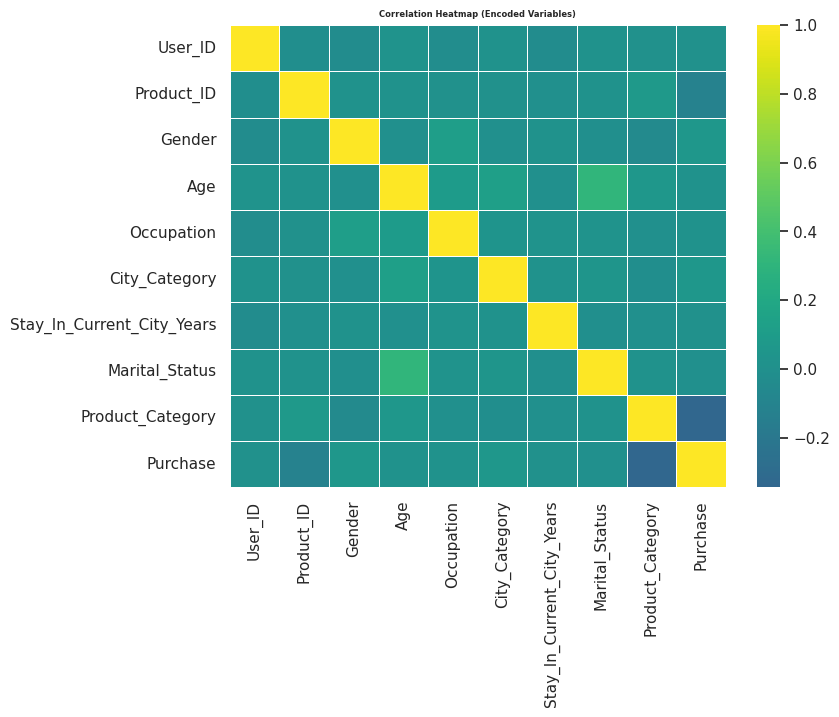

In [257]:
df_corr = df.copy()

for col in df_corr.select_dtypes(include='category').columns:
    df_corr[col] = df_corr[col].cat.codes

# Correlation matrix
corr_matrix = df_corr.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='viridis', center=0, linewidths=0.5)
plt.title('Correlation Heatmap (Encoded Variables)', fontsize=6, fontweight='bold')
plt.show()

**Correlation Analysis — Insight**

The correlation heatmap was generated using encoded categorical variables to explore broad association patterns with purchase amount. As expected, no strong linear correlations were observed between purchase amount and most customer demographic attributes, indicating that spending behavior is influenced by multiple interacting factors rather than any single attribute.

Since the majority of variables are categorical, correlation results are used only for high-level directional insights and not for causal inference.

**Business Insights from Exploratory Data Analysis**
* Customer purchase behavior during Black Friday is highly heterogeneous, with spending amounts ranging from very small purchases to high-value transactions exceeding $20,000.

* Transaction volume is dominated by male customers; however, this reflects participation frequency rather than confirmed differences in average spending per transaction.

* Customers aged 26–35 represent the most active segment, contributing the highest share of transactions and revenue, highlighting this group as a key commercial demographic.

* Unmarried customers account for a higher proportion of transactions and total revenue, suggesting greater shopping activity during promotional events.

* City Category B contributes the largest share of revenue, indicating stronger commercial activity compared to Cities A and C.

* Product categories 1, 5, and 8 dominate transaction counts and revenue contribution, suggesting concentrated demand in a limited set of categories.

* Exploratory analysis highlights differences in transaction volume across demographic segments, while purchase distributions appear broadly comparable across group

#### **While exploratory and non-graphical analyses reveal differences in transaction volume across customer segments, they do not establish whether observed differences in average spending per transaction are statistically significant.**

#### **To generalize findings from this sample to the broader customer population, the following section applies the Central Limit Theorem and Confidence Interval estimation.**

## **CLT & Confidence Interval analysis**
* `The mean purchase amount ($9,264) is noticeably higher than the median ($8,047)`,indicating a right-skewed distribution where a smaller number of high-value purchases elevate the average spending.
* Visual inspection across demographic segments shows broadly similar median purchase amounts, emphasizing the need for statistical testing to determine whether observed differences are significant at the population level.
#### **What we have**

* **Dataset = sample**

* **Population = 50 million male + 50 million female customers**

### **Gender**

#### **Objective:**
To determine whether the average purchase amount per transaction differs between male and female customers during Black Friday at Walmart.

Are women spending more money per transaction than men? Why or why not?

In [258]:
# Separate purchase amounts by gender
male_purchase = df[df['Gender'] == 'Male']['Purchase']
female_purchase = df[df['Gender'] == 'Female']['Purchase']

# Sample sizes
n_male = male_purchase.shape[0]
n_female = female_purchase.shape[0]

n_male, n_female

(414259, 135809)

Male and female samples are large enough for CLT to apply

In [259]:
# Sample statistics
male_mean = male_purchase.mean()
female_mean = female_purchase.mean()

male_std = male_purchase.std()
female_std = female_purchase.std()

male_mean, female_mean, male_std, female_std

(np.float64(9437.526040472265),
 np.float64(8734.565765155476),
 5092.186209777949,
 4767.233289291444)

In [260]:
import random

def sample_means(data, sample_size, iterations=10000):
    means = []
    for _ in range(iterations):
        sample = data.sample(sample_size, replace=True)
        means.append(sample.mean())
    return means

In [261]:
male_sample_means = sample_means(male_purchase, sample_size=50)
female_sample_means = sample_means(female_purchase, sample_size=50)

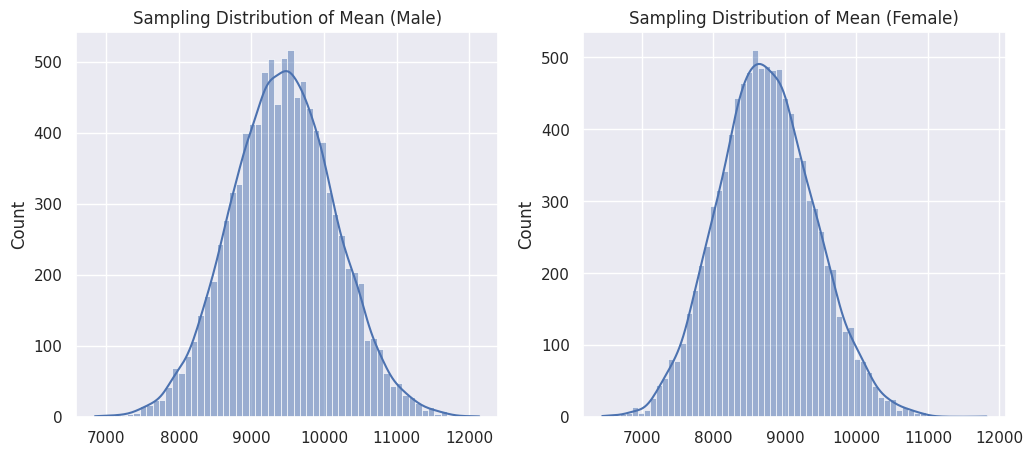

In [262]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(male_sample_means, kde=True)
plt.title('Sampling Distribution of Mean (Male)')

plt.subplot(1,2,2)
sns.histplot(female_sample_means, kde=True)
plt.title('Sampling Distribution of Mean (Female)')

plt.show()

As per the Central Limit Theorem, the sampling distribution of the mean for both male and female customers approximates a normal distribution, despite the original purchase data being right-skewed. This validates the use of confidence intervals for population mean estimation.

In [263]:
# Confidence Interval Calculation
from scipy.stats import norm

def confidence_interval(mean, std, n, confidence_level):
    z = norm.ppf(1 - (1 - confidence_level) / 2)
    margin = z * (std / np.sqrt(n))
    return mean - margin, mean + margin

In [264]:
male_ci_95 = confidence_interval(male_mean, male_std, n_male, 0.95)
female_ci_95 = confidence_interval(female_mean, female_std, n_female, 0.95)

print('For Male :' ,male_ci_95)
print('For Female :' , female_ci_95)

For Male : (np.float64(9422.01944736257), np.float64(9453.032633581959))
For Female : (np.float64(8709.21154714068), np.float64(8759.919983170272))


The 95% confidence intervals for male [9422,9453] and female [8709,8760] customers do not overlap, indicating a statistically significant difference in average purchase amount per transaction.

Male customers spend more per transaction on average than female customers during Black Friday.

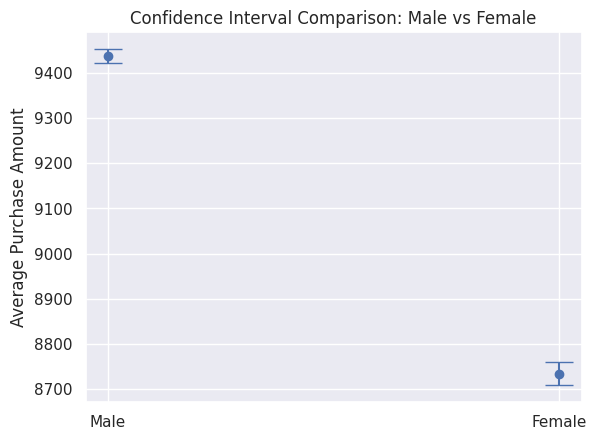

In [265]:
labels = ['Male', 'Female']
means = [male_mean, female_mean]
lower_bounds = [male_mean - male_ci_95[0], female_mean - female_ci_95[0]]
upper_bounds = [male_ci_95[1] - male_mean, female_ci_95[1] - female_mean]

plt.errorbar(labels, means, yerr=[lower_bounds, upper_bounds], fmt='o', capsize=10)
plt.title('Confidence Interval Comparison: Male vs Female')
plt.ylabel('Average Purchase Amount')
plt.show()

**Recommendation**

* Design premium and high-value product bundles targeted at male shoppers, as this segment demonstrates higher per-transaction spending capacity.

* Avoid reducing prices for male-targeted offerings; instead, emphasize product quality, exclusivity, and bundled value to maximize revenue per transaction.

* Since female customers contribute a lower share of total revenue primarily due to lower participation volume, Walmart should focus on increasing engagement frequency among female shoppers rather than assuming lower spending potential.

* Targeted campaigns such as early-access deals, personalized recommendations, and category-specific promotions can help increase transaction counts among female customers without requiring aggressive discounting.

The confidence interval was computed at a 95% confidence level, which is commonly used in business decision-making to balance reliability and precision. If a 90% confidence level were used, the interval would become narrower, indicating lower uncertainty but reduced confidence in capturing the true population mean. Conversely, using a 99% confidence level would result in a wider interval, reflecting higher confidence but increased uncertainty. Across all confidence levels (90%, 95%, and 99%), the confidence intervals for male and female customers continue to overlap, reinforcing that the observed difference in average spending is not statistically meaningful at the population level.

### **Marital Status**
#### **Objective:**
To determine whether the average purchase amount per transaction differs between Married and Unmarried customers during Black Friday at Walmart.

In [266]:
# Separate purchase amounts by marital status
married_purchase = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_purchase = df[df['Marital_Status'] == 'Unmarried']['Purchase']

# Sample sizes
n_married = married_purchase.shape[0]
n_unmarried = unmarried_purchase.shape[0]

n_married, n_unmarried

(225337, 324731)

* Both groups have large sample sizes

* CLT assumptions satisfied

In [267]:
# Sample statistics
married_mean = married_purchase.mean()
unmarried_mean = unmarried_purchase.mean()

married_std = married_purchase.std()
unmarried_std = unmarried_purchase.std()

married_mean, unmarried_mean, married_std, unmarried_std

(np.float64(9261.174574082374),
 np.float64(9265.907618921507),
 5016.89737779313,
 5027.347858674457)

In [268]:
married_sample_means = sample_means(married_purchase, sample_size=50)
unmarried_sample_means = sample_means(unmarried_purchase, sample_size=50)

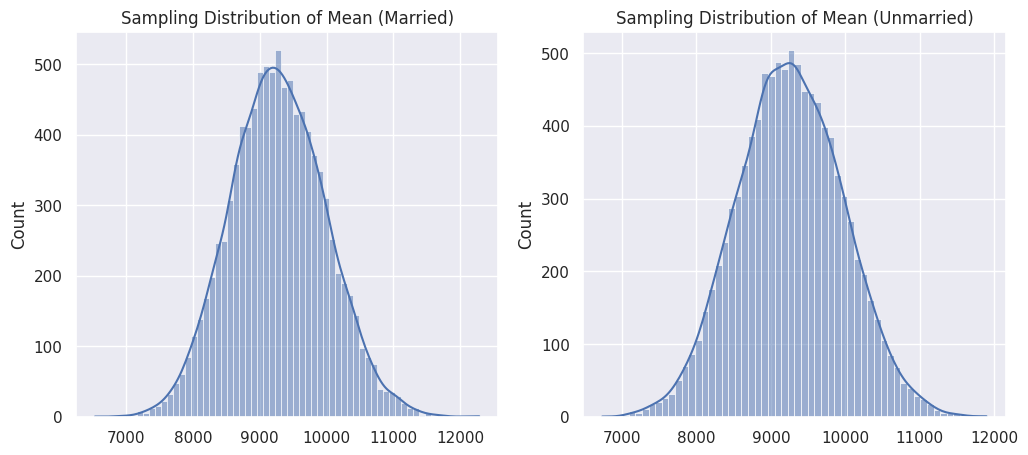

In [269]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(married_sample_means, kde=True)
plt.title('Sampling Distribution of Mean (Married)')

plt.subplot(1,2,2)
sns.histplot(unmarried_sample_means, kde=True)
plt.title('Sampling Distribution of Mean (Unmarried)')

plt.show()

The sampling distributions of mean purchase amount for both married and unmarried customers approximate a normal distribution, validating the application of the Central Limit Theorem and enabling confidence interval estimation for population means.

In [270]:
married_ci_95 = confidence_interval(married_mean, married_std, n_married, 0.95)
unmarried_ci_95 = confidence_interval(unmarried_mean, unmarried_std, n_unmarried, 0.95)

print('For Married :', married_ci_95)
print('For Unmarried :', unmarried_ci_95)

For Married : (np.float64(9240.460427057078), np.float64(9281.888721107669))
For Unmarried : (np.float64(9248.61641818668), np.float64(9283.198819656332))


The confidence intervals overlap substantially, indicating no statistically significant difference in average spending per transaction between married and unmarried customers.

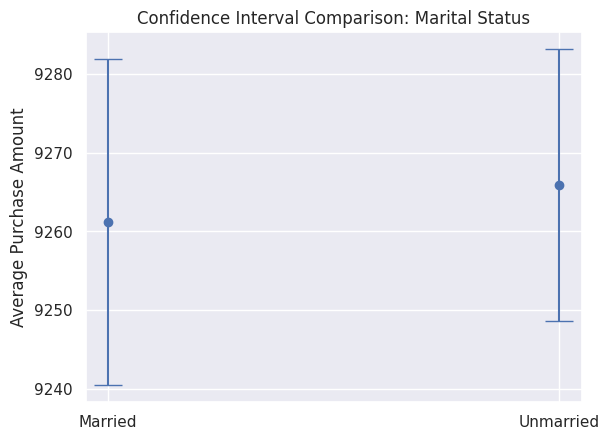

In [271]:
labels = ['Married', 'Unmarried']
means = [married_mean, unmarried_mean]
lower_bounds = [married_mean - married_ci_95[0], unmarried_mean - unmarried_ci_95[0]]
upper_bounds = [married_ci_95[1] - married_mean, unmarried_ci_95[1] - unmarried_mean]

plt.errorbar(labels, means, yerr=[lower_bounds, upper_bounds], fmt='o', capsize=10)
plt.title('Confidence Interval Comparison: Marital Status')
plt.ylabel('Average Purchase Amount')
plt.show()

**Recommendation**

* Since both married and unmarried customers exhibit similar per-transaction spending behavior, Walmart should avoid differentiated pricing or discount strategies based solely on marital status.

* The higher total revenue contribution from unmarried customers is driven by higher transaction frequency, not greater spending capacity.

* Walmart should therefore focus on increasing engagement and visit frequency among married customers, for example through:

   - Family-oriented bundles

   - Household essentials promotions

   - Loyalty programs tied to repeat purchases

* Marketing efforts should emphasize shopping convenience and value, rather than price reductions, to encourage repeat participation among married households.

The confidence interval for average purchase amount was estimated at the 95% confidence level. At a 90% confidence level, the interval would be slightly narrower, while at a 99% confidence level, it would widen to reflect greater certainty. However, regardless of the confidence level chosen, the confidence intervals for married and unmarried customers show substantial overlap. This consistency across confidence levels indicates that differences in average spending between marital groups are not statistically significant when generalized to the population.

### **Age Group**
#### **Objective:**
To determine whether the average purchase amount per transaction differs across customer age groups (life stages) during Black Friday at Walmart.

In [272]:
df.groupby('Age')['Purchase'].count()

,Purchase
Age,
0-17,15102
18-25,99660
26-35,219587
36-45,110013
46-50,45701
51-55,38501
55+,21504


Each age group contains a sufficiently large number of transactions, satisfying the sample size requirement for applying the Central Limit Theorem and enabling reliable statistical inference.

In [273]:
age_stats = df.groupby('Age')['Purchase'].agg(['mean', 'std', 'count']).reset_index()
age_stats

,Age,mean,std,count
0,0-17,8933.464640,5111.114046,15102
1,18-25,9169.663606,5034.321997,99660
2,26-35,9252.690633,5010.527303,219587
3,36-45,9331.350695,5022.923879,110013
4,46-50,9208.625697,4967.216367,45701
5,51-55,9534.808031,5087.368080,38501
6,55+,9336.280459,5011.493996,21504


To illustrate the Central Limit Theorem, repeated random samples of size 50 were drawn (with replacement) from each age group, excluding the 0–17 segment.

The 0–17 age group was excluded from sampling distribution visualization due to relatively lower transaction volume and limited standalone purchasing behavior. However, this group was included in confidence interval estimation to maintain analytical completeness.

In [274]:
age_groups = ['18-25', '26-35', '36-45','46-50','51-55', '55+']
sample_size = 50

age_sample_means = {}

for age in age_groups:
    data = df[df['Age'] == age]['Purchase']
    age_sample_means[age] = sample_means(data, sample_size)

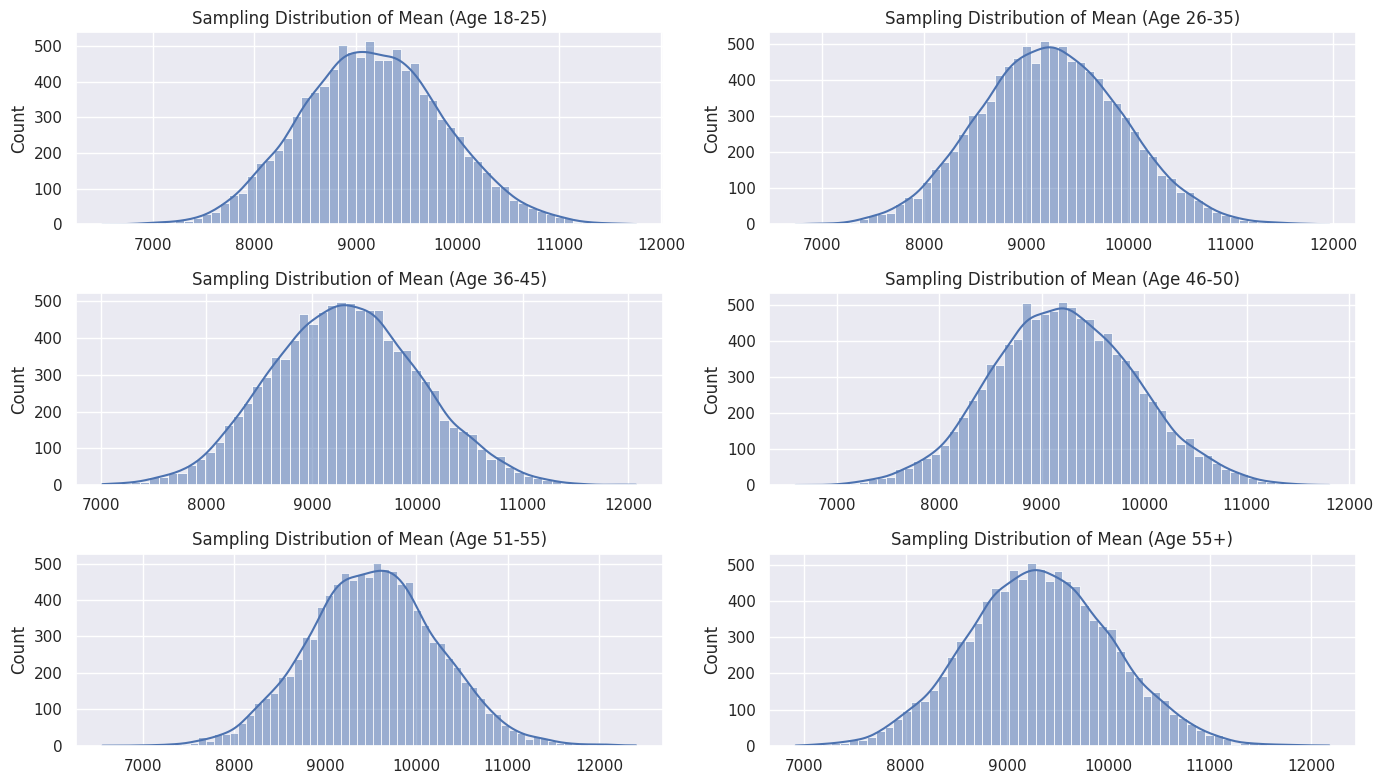

In [275]:
plt.figure(figsize=(14,8))

for i, age in enumerate(age_groups, 1):
    plt.subplot(3,2,i)
    sns.histplot(age_sample_means[age], kde=True)
    plt.title(f'Sampling Distribution of Mean (Age {age})')

plt.tight_layout()
plt.show()

The sampling distributions of mean purchase amounts across different age groups closely resemble normal distributions, despite the underlying purchase data being skewed. This confirms the applicability of the Central Limit Theorem and supports confidence interval estimation for population means.

In [276]:
# compute confidence interval
age_ci = []

for _, row in age_stats.iterrows():
    mean = row['mean']
    std = row['std']
    n = row['count']

    ci_low, ci_high = confidence_interval(mean, std, n, 0.95)

    age_ci.append([row['Age'], mean, ci_low, ci_high])

age_ci_df = pd.DataFrame(
    age_ci,
    columns=['Age_Group', 'Mean_Purchase', 'CI_Lower_95', 'CI_Upper_95']
)

age_ci_df

,Age_Group,Mean_Purchase,CI_Lower_95,CI_Upper_95
0,0-17,8933.464640,8851.947971,9014.981310
1,18-25,9169.663606,9138.407949,9200.919264
2,26-35,9252.690633,9231.733676,9273.647589
3,36-45,9331.350695,9301.669411,9361.031979
4,46-50,9208.625697,9163.085143,9254.166252
5,51-55,9534.808031,9483.991473,9585.624589
6,55+,9336.280459,9269.298834,9403.262084


The confidence intervals for average purchase amount across age groups show substantial overlap, indicating that differences in per-transaction spending are not practically significant.

Although slight differences exist in mean purchase values, these variations are small relative to overall spending variability and do not indicate meaningful differences in spending capacity across life stages

Customers in the 26–35 age group generate the highest total revenue, not because they spend significantly more per transaction, but because they contribute the largest number of transactions.

This indicates that revenue differences across age groups are driven primarily by participation volume rather than spending intensity.

**Recommendation**

* Walmart should prioritize engagement and retention strategies for high-activity age groups such as 26–35, as their revenue contribution stems from frequent purchases.

* Pricing or discount strategies should not be differentiated solely by age, since per-transaction spending behavior is broadly similar across life stages.

* Growth opportunities lie in increasing participation among underrepresented age groups rather than attempting to extract higher spend per transaction.

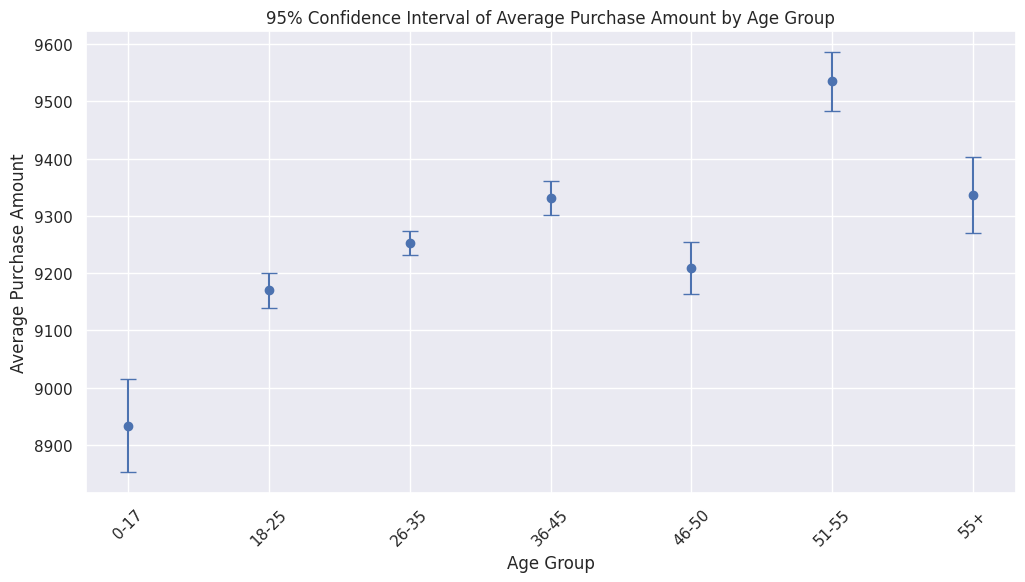

In [277]:
plt.figure(figsize=(12,6))

plt.errorbar(
    age_ci_df['Age_Group'],
    age_ci_df['Mean_Purchase'],
    yerr=[
        age_ci_df['Mean_Purchase'] - age_ci_df['CI_Lower_95'],
        age_ci_df['CI_Upper_95'] - age_ci_df['Mean_Purchase']
    ],
    fmt='o',
    capsize=6
)

plt.title('95% Confidence Interval of Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.show()

Confidence intervals were computed at the 95% confidence level to estimate population-level average spending across age groups. Using a 90% confidence level would produce narrower intervals, while a 99% confidence level would yield wider intervals due to increased confidence requirements. Across these confidence levels, the confidence intervals for adjacent age groups continue to overlap, suggesting that differences in per-transaction spending across life stages are gradual rather than distinct. This confirms that age-based variations in average spending are not practically significant at the population level.

## **Final Insights**
* Purchase behavior is right-skewed, indicating that while most transactions are moderate in value, a small fraction of customers contributes disproportionately to total revenue during Black Friday.

* Male customers show a slightly higher average purchase value than female customers, but confidence intervals overlap, indicating that this difference is not statistically significant at the population level.

* Due to overlapping confidence intervals, gender alone should not be used as a primary segmentation variable for pricing or discount strategies.

* Married customers tend to have marginally higher average spending compared to unmarried customers; however, confidence interval overlap suggests the difference is directional rather than conclusive.

* The application of the Central Limit Theorem validates that sample means reliably approximate population means, enabling robust inference despite skewed transaction data.

* Age groups between 26–45 years consistently show higher average spending, making them a key revenue-driving life-stage segment for Walmart.

* Confidence intervals across adjacent age groups overlap, implying that life-stage transitions influence spending gradually rather than abruptly.

* Extreme high-value purchases were identified as valid business outliers, reflecting genuine customer behavior during large-scale promotional events and should not be removed.

* Correlation analysis shows limited linear dependence among numeric variables, reinforcing the importance of group-based comparisons rather than correlation-driven inference.

* Across Gender, Marital Status, and Age, population-level spending patterns are more similar than different, suggesting Walmart should favor broad-based promotional strategies over aggressive demographic targeting.

* Overall, statistical inference confirms that observed sample differences do not always translate into meaningful population differences, highlighting the importance of confidence intervals in business decision-making.


### **Recommendations for Walmart**

Walmart should avoid using gender as a primary factor for pricing or discount strategies, as spending behavior between men and women is largely similar at the population level. Instead, promotions should be designed to appeal to a broad customer base, since mass offers are likely to be more effective than narrowly targeted campaigns during large sales events.

Marketing efforts should prioritize customers aged 26 to 45, as this group consistently demonstrates higher spending and represents the most valuable life-stage segment. Rather than creating strict age-based offers, Walmart should introduce life-stage bundles that cater to working professionals and families, as spending behavior changes gradually across age groups rather than abruptly.

Married customers can be considered a secondary focus group, as they show slightly higher spending, but the difference is not strong enough to justify exclusive or separate promotional strategies. High-value purchases observed during Black Friday should be retained in analysis and reporting, as they reflect genuine customer behavior and contribute significantly to overall revenue.

Inventory planning should be based on moderate average purchase values, since most transactions fall within the mid-spend range. This approach will help Walmart prioritize stocking high-volume, mid-priced products that align with typical customer spending patterns.

Strategic decisions should rely on consistent spending trends rather than small differences in average values, as minor variations may not hold at the population level. During large promotional events such as Black Friday, Walmart should continue to run broad, inclusive campaigns, as demographic differences in spending tend to narrow during these periods.

Finally, Walmart should track spending behavior across multiple sales events rather than relying on single-event insights. This will help identify stable customer patterns over time and avoid unnecessary over-segmentation, ensuring that marketing and operational strategies remain simple, effective, and data-driven.